In [34]:
import warnings
warnings.filterwarnings('ignore')

#!pip install numpy pandas matplotlib seaborn scikit-learn statsmodels datetime tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data/processed_aqi_data.csv')
data.head()

,timestamp,location_name,location_lat,location_lon,co,no2,o3,pm10,pm25,so2,aqi,aqi_category,hour,day,month,year,day_of_week,is_weekend
0,2019-01-01 00:00:00,Delhi,28.7041,77.1025,0.598089,24.943655,18.081507,108.281832,75.196148,4.378213,221.629670,Poor,0,1,1,2019,1,0
1,2019-01-01 00:00:00,Faridabad,28.4089,77.3178,1.093698,5.699821,53.686134,56.260069,42.709284,6.493686,137.180953,Moderate,0,1,1,2019,1,0
2,2019-01-01 00:00:00,Ghaziabad,28.6692,77.4538,0.420770,19.419563,34.967340,82.842934,59.295449,4.423260,205.059468,Poor,0,1,1,2019,1,0
3,2019-01-01 00:00:00,Gurgaon,28.4595,77.0266,0.706815,30.585009,35.874847,117.015282,75.435553,7.511787,221.879156,Poor,0,1,1,2019,1,0
4,2019-01-01 00:00:00,Noida,28.5355,77.3910,0.542118,23.626271,39.401078,116.208836,68.843636,6.828320,215.009684,Poor,0,1,1,2019,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219125 entries, 0 to 219124
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   timestamp      219125 non-null  object 
 1   location_name  219125 non-null  object 
 2   location_lat   219125 non-null  float64
 3   location_lon   219125 non-null  float64
 4   co             219125 non-null  float64
 5   no2            219125 non-null  float64
 6   o3             219125 non-null  float64
 7   pm10           219125 non-null  float64
 8   pm25           219125 non-null  float64
 9   so2            219125 non-null  float64
 10  aqi            219125 non-null  float64
 11  aqi_category   219125 non-null  object 
 12  hour           219125 non-null  int64  
 13  day            219125 non-null  int64  
 14  month          219125 non-null  int64  
 15  year           219125 non-null  int64  
 16  day_of_week    219125 non-null  int64  
 17  is_weekend     219125 non-nul

In [30]:
data.isna().sum()

timestamp        0
location_name    0
location_lat     0
location_lon     0
co               0
no2              0
o3               0
pm10             0
pm25             0
so2              0
aqi              0
aqi_category     0
hour             0
day              0
month            0
year             0
day_of_week      0
is_weekend       0
dtype: int64

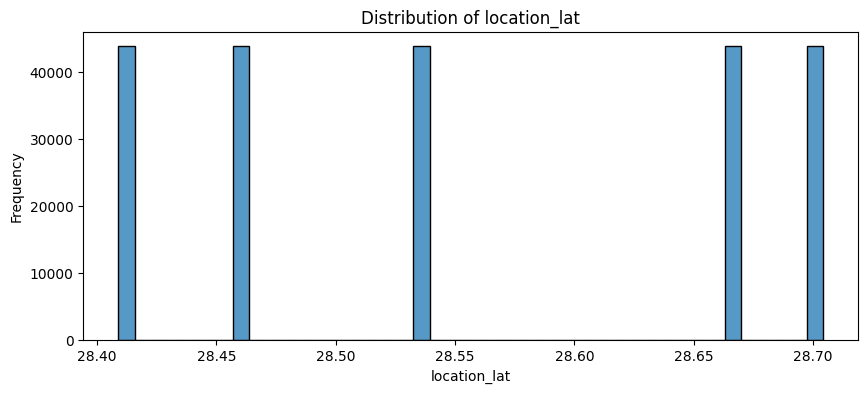

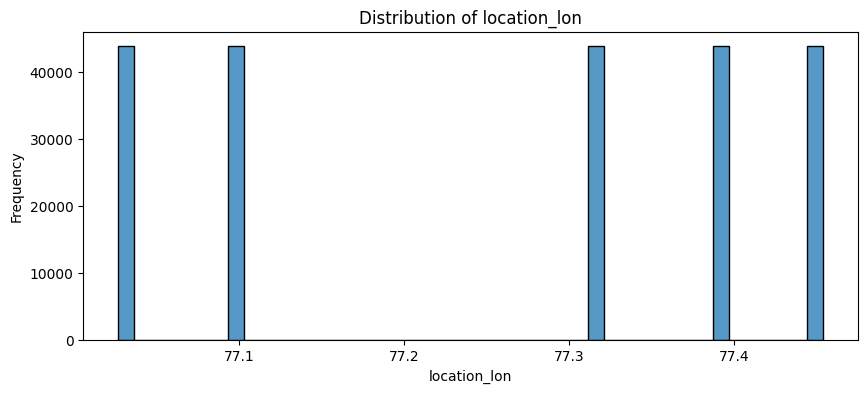

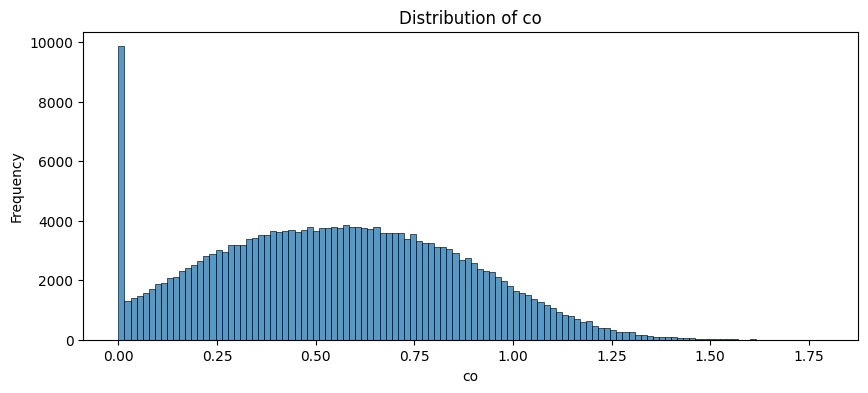

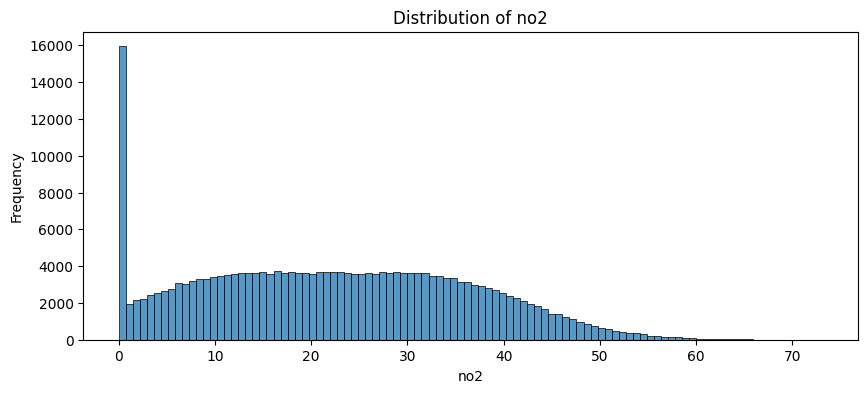

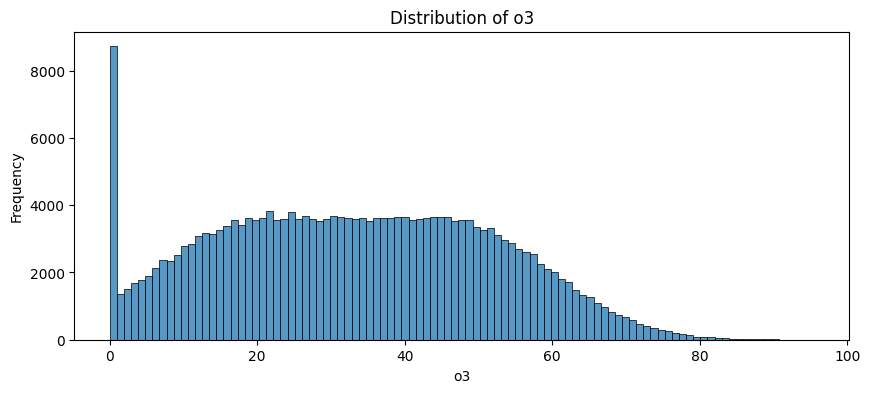

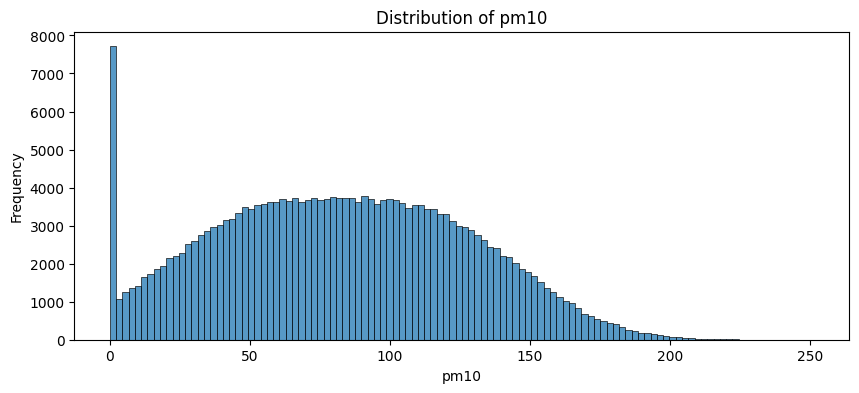

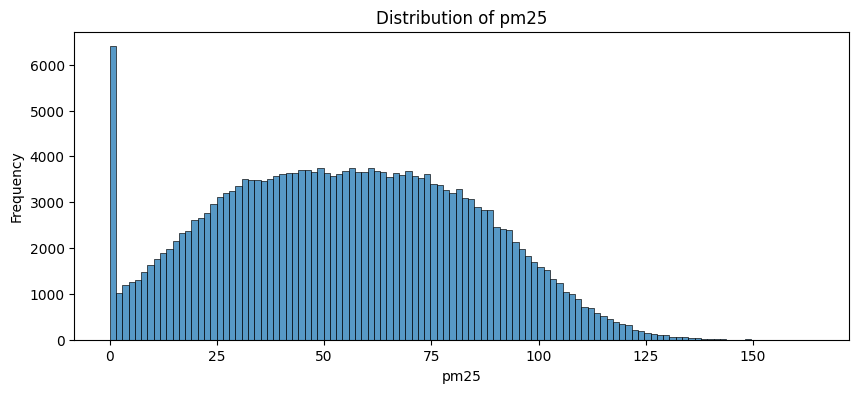

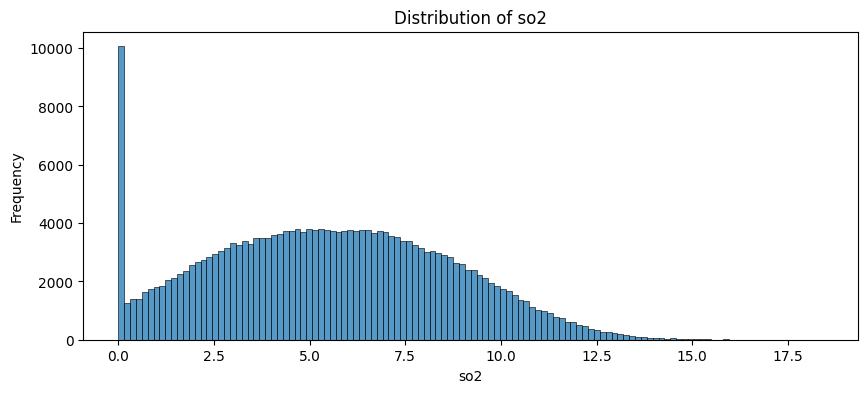

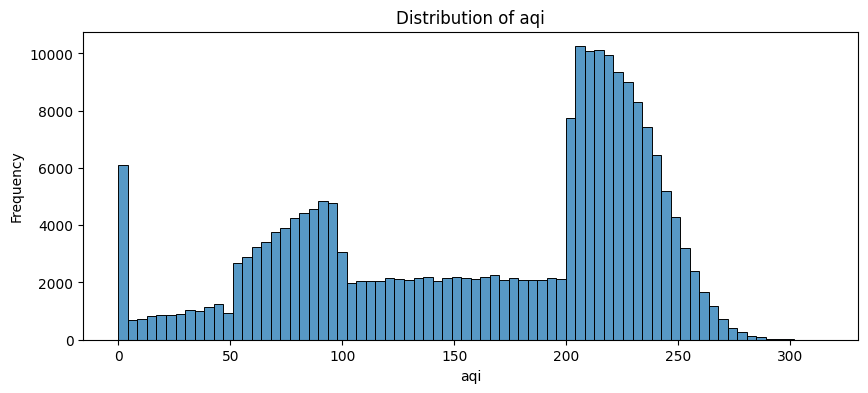

In [43]:
for col in data.select_dtypes(include='float64').columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

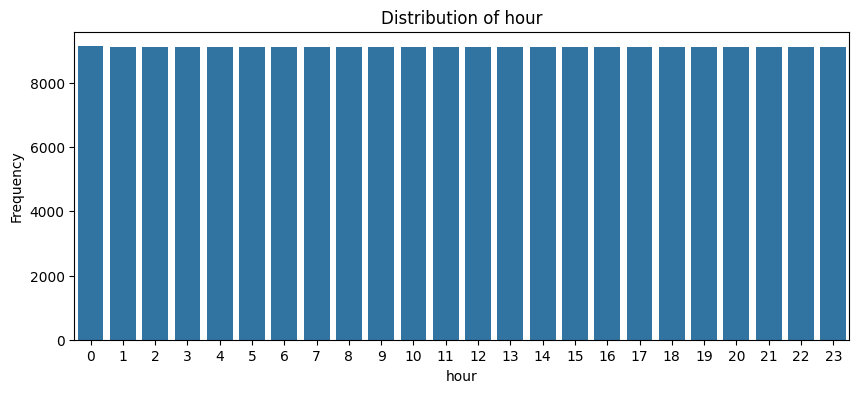

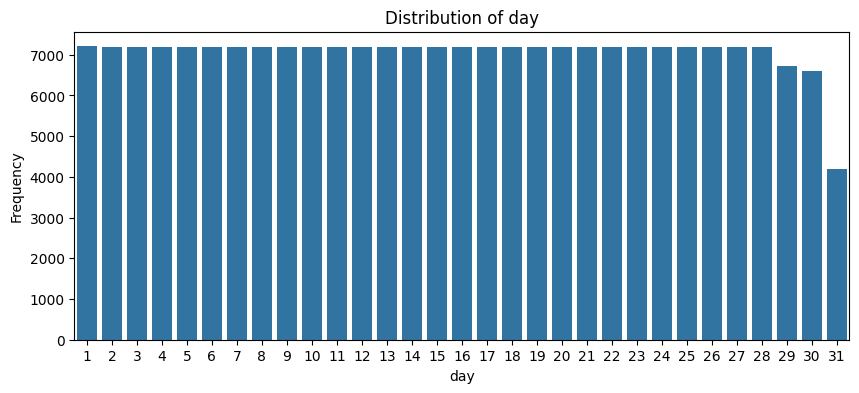

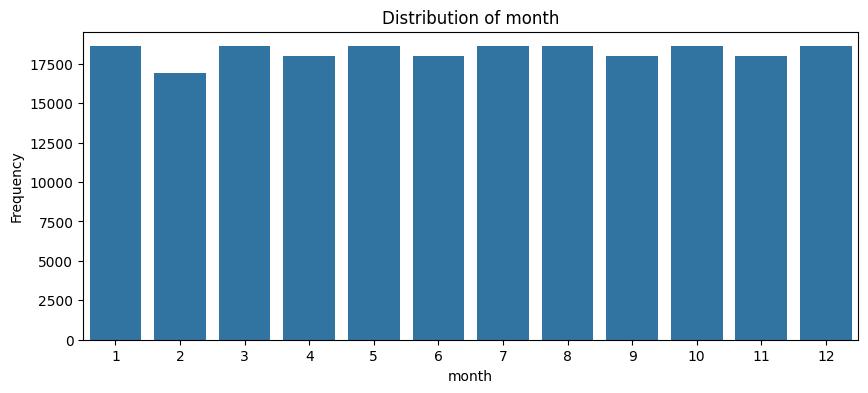

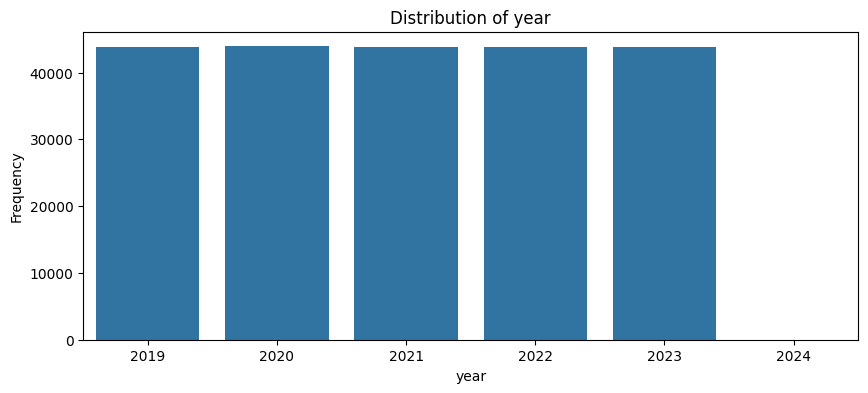

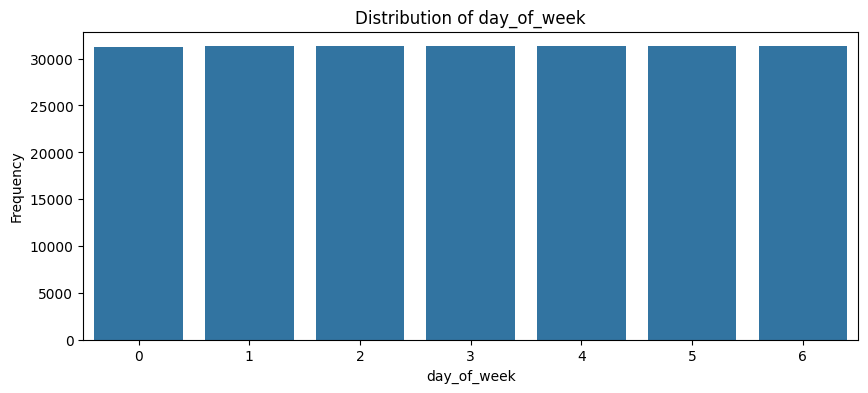

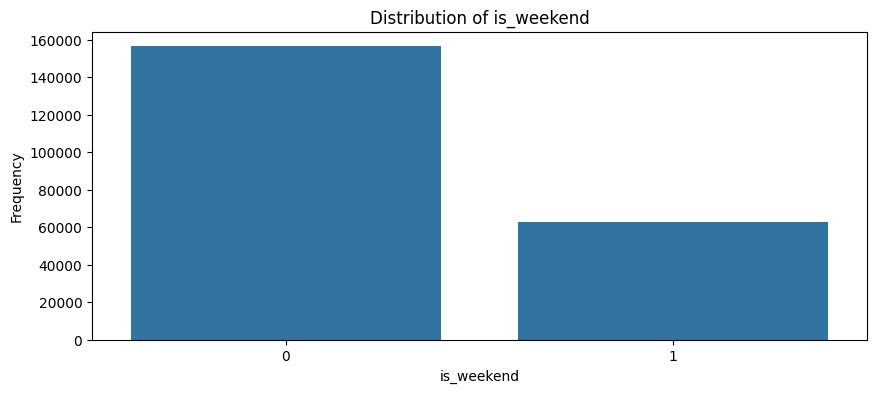

In [37]:
for col in data.select_dtypes(include='int64').columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [18]:
for col in data.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    print(data[col].describe())


Column: timestamp
count                  219125
unique                  43825
top       2019-01-01 00:00:00
freq                        5
Name: timestamp, dtype: object

Column: location_name
count     219125
unique         5
top        Delhi
freq       43825
Name: location_name, dtype: object

Column: aqi_category
count     219125
unique         5
top         Poor
freq      108104
Name: aqi_category, dtype: object


In [29]:
print(f'Unique locations: {data["location_name"].unique()}\n')
print(data['aqi_category'].value_counts())

Unique locations: ['Delhi' 'Faridabad' 'Ghaziabad' 'Gurgaon' 'Noida']

aqi_category
Poor            108104
Moderate         49371
Satisfactory     45312
Good             16332
Very Poor            6
Name: count, dtype: int64


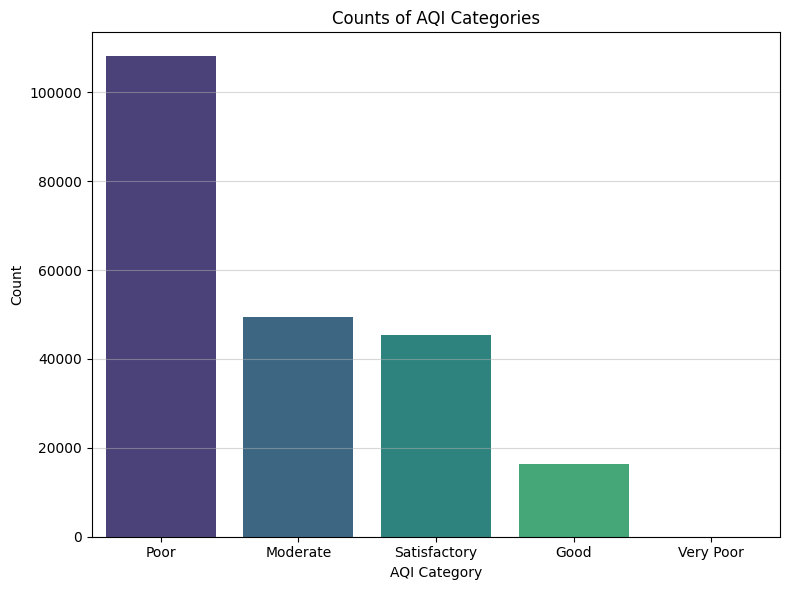

In [54]:
plt.figure(figsize=(8, 6))
sns.countplot(data, x='aqi_category', palette='viridis')
plt.title('Counts of AQI Categories')
plt.xlabel('AQI Category')
plt.ylabel('Count')
plt.xticks()
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

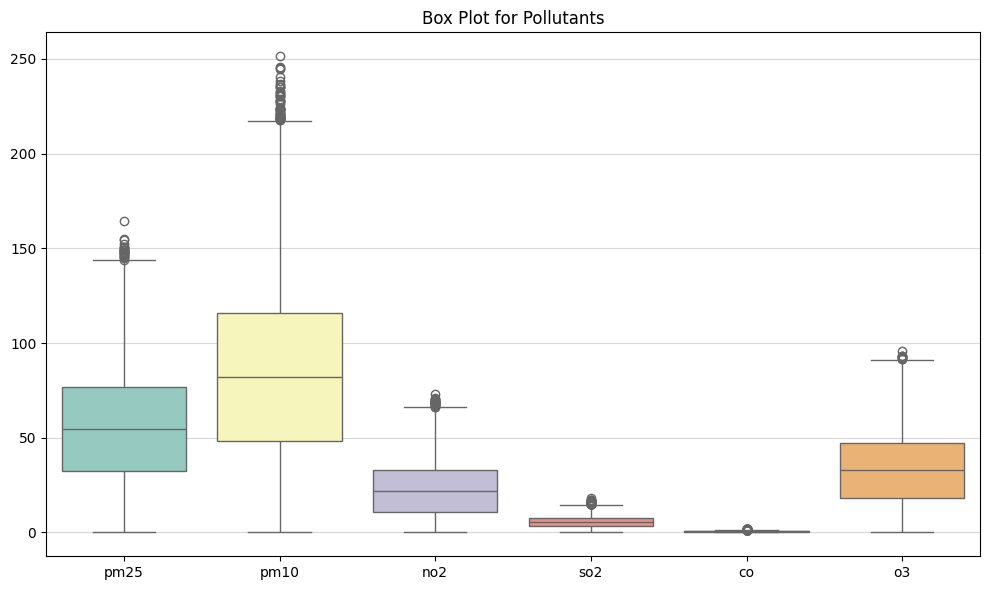

In [58]:
polutant_cols = ['pm25', 'pm10', 'no2', 'so2', 'co', 'o3']
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[polutant_cols], palette='Set3')
plt.title('Box Plot for Pollutants')
plt.xticks()
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

In [60]:
(data['co'] == 0).sum()

np.int64(8740)

In [67]:
for col in data.select_dtypes(include='float64').columns:
    print(f'{col} : {(data[col] == 0).sum()}')


location_lat : 0
location_lon : 0
co : 8740
no2 : 14113
o3 : 7477
pm10 : 6768
pm25 : 5499
so2 : 8910
aqi : 5499


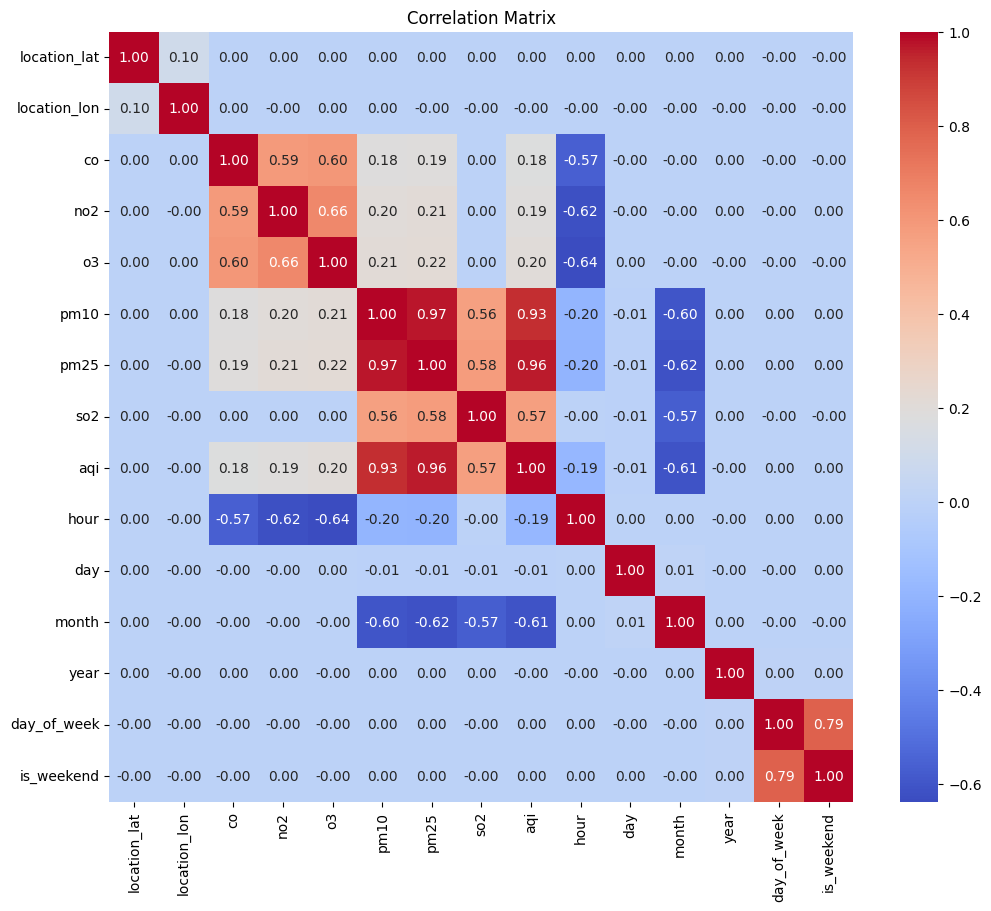

In [71]:
numerical_df = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 10))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

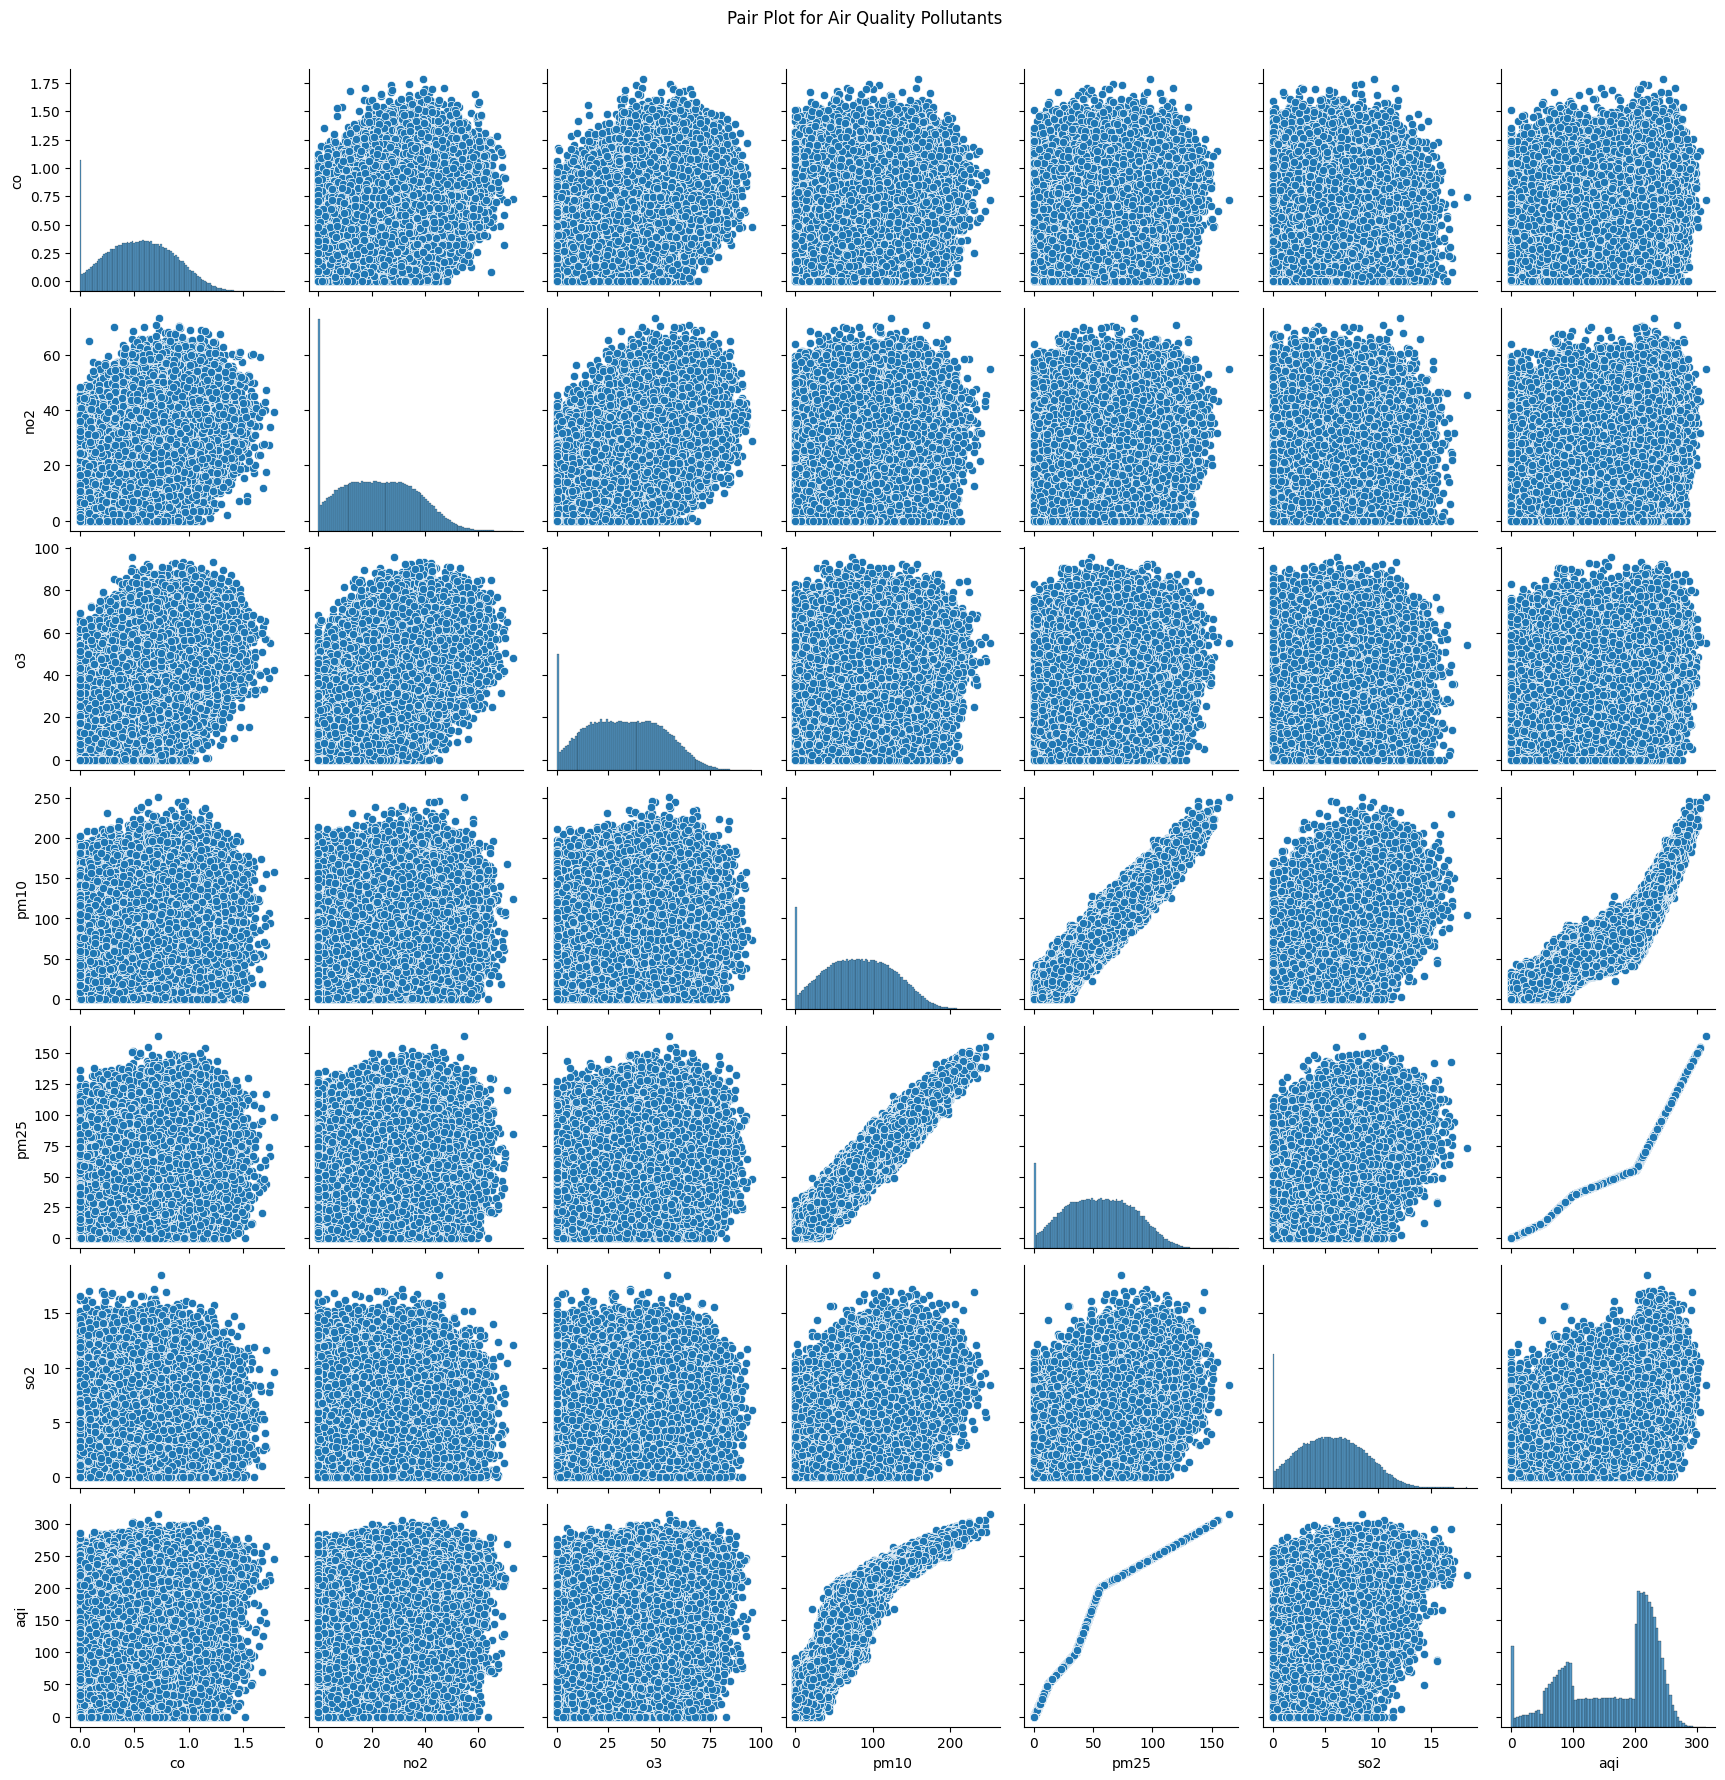

In [72]:
selected_cols = ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'aqi']
sns.pairplot(data[selected_cols].dropna())
plt.suptitle('Pair Plot for Air Quality Pollutants', y=1.02)
plt.show()